In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from xml.etree import ElementTree as ET
import os
import sys
from tqdm import tqdm
from collections import Counter
import pandas as pd
tqdm.pandas()

In [2]:
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

%cd ../../

/media/premium/common-biscuit/main/planogram_biscuit


In [31]:
annotations_folder = "data/raw/annotations_master/"
samples = os.listdir(annotations_folder)
output = []
for sample in tqdm(samples):
    flag = 0
    rows_data = {}
    rows_height = []
    row_ymin = []
    input_file = os.path.join(annotations_folder, sample)
    try:
        tree = ET.parse(input_file)
        root_element = tree.getroot()
        rows_data['name'] = (root_element.find('filename').text).split('.')[0]
        for obj in root_element.findall('object'):
            name = obj.find('name').text
            if name in ['rack row', 'rack Row', 'Rack row', 'Rack Row']:
                if ((int(obj.find('bndbox').find('ymax').text) - int(obj.find('bndbox').find('ymin').text)) < 400):
                    rows_height.append((int(obj.find('bndbox').find('ymax').text) - int(obj.find('bndbox').find('ymin').text)))
                    row_ymin.append(int(obj.find('bndbox').find('ymin').text))
                else:
                    flag = 1
    except:
        continue

    if flag == 1:
        continue
    else:
        rows_data['row_heights'] = rows_height
        rows_data['row_ymin'] = row_ymin
        output.append(rows_data)

100%|██████████| 1607/1607 [00:01<00:00, 836.42it/s]


In [32]:
df = pd.DataFrame.from_dict(output)
df

,name,row_heights,row_ymin
0,PHOTO-2021-07-02-10-18-46,"[277, 280, 267, 193, 179, 160, 168]","[6, 278, 569, 851, 851, 1067, 1242]"
1,PHOTO-2021-06-24-10-51-50,"[204, 184, 126, 115, 111, 100, 87, 82, 79, 88]","[81, 293, 489, 638, 774, 909, 1034, 1146, 1252..."
2,PHOTO-2021-06-24-10-56-32,"[159, 106, 108, 105, 127, 135, 157, 170, 180, ...","[116, 279, 405, 546, 656, 778, 881, 992, 1099,..."
3,PHOTO-2021-06-24-10-59-11,"[119, 340, 273, 271, 225, 187]","[1, 173, 571, 880, 1172, 1412]"
4,PHOTO-2021-06-24-11-12-43,"[222, 212, 176, 155, 110, 102, 107, 105, 112, ...","[25, 221, 420, 598, 774, 919, 1058, 1192, 1309..."
...,...,...,...
1443,PHOTO-2021-07-28-10-40-10,"[143, 271, 242, 240, 206, 167, 133]","[1, 148, 434, 697, 953, 1180, 1368]"
1444,PHOTO-2021-07-28-11-23-57,"[157, 198, 173, 185, 156, 182, 157]","[123, 321, 549, 749, 952, 1131, 1332]"
1445,PHOTO-2021-07-28-11-24-49,"[164, 227, 182, 190, 161, 185, 158]","[36, 241, 498, 712, 927, 1116, 1322]"
1446,PHOTO-2021-07-28-11-38-54,"[196, 272, 242, 234, 217, 169, 169]","[1, 205, 486, 746, 991, 1226, 1414]"


In [33]:
df[df['name'] == 'PHOTO-2021-07-21-09-19-00']

,name,row_heights,row_ymin


In [34]:
df_1 = df.apply(lambda x: x.explode() if x.name in ['row_heights', 'row_ymin'] else x)
df_1

,name,row_heights,row_ymin
0,PHOTO-2021-07-02-10-18-46,277,6
0,PHOTO-2021-07-02-10-18-46,280,278
0,PHOTO-2021-07-02-10-18-46,267,569
0,PHOTO-2021-07-02-10-18-46,193,851
0,PHOTO-2021-07-02-10-18-46,179,851
...,...,...,...
1447,PHOTO-2021-07-28-11-59-01,246,520
1447,PHOTO-2021-07-28-11-59-01,242,741
1447,PHOTO-2021-07-28-11-59-01,263,913
1447,PHOTO-2021-07-28-11-59-01,343,1082


In [35]:
df_1[df_1['name'] == 'PHOTO-2021-07-21-09-19-00']

,name,row_heights,row_ymin


In [36]:
df_1 = df_1.reset_index().sort_values(['index', 'row_ymin'])
df_1.head(10)

,index,name,row_heights,row_ymin
0,0,PHOTO-2021-07-02-10-18-46,277,6
1,0,PHOTO-2021-07-02-10-18-46,280,278
2,0,PHOTO-2021-07-02-10-18-46,267,569
3,0,PHOTO-2021-07-02-10-18-46,193,851
4,0,PHOTO-2021-07-02-10-18-46,179,851
5,0,PHOTO-2021-07-02-10-18-46,160,1067
6,0,PHOTO-2021-07-02-10-18-46,168,1242
7,1,PHOTO-2021-06-24-10-51-50,204,81
8,1,PHOTO-2021-06-24-10-51-50,184,293
9,1,PHOTO-2021-06-24-10-51-50,126,489


In [37]:
df_top_height = df_1.loc[~df_1.name.duplicated(keep='first')].drop('row_ymin', axis = 1).rename(columns={'row_heights':'top_row_height'})
#top_height.reset_index(drop = True, inplace = True)
df_top_height.drop('index', axis = 1, inplace = True)
df_top_height

,name,top_row_height
0,PHOTO-2021-07-02-10-18-46,277
7,PHOTO-2021-06-24-10-51-50,204
17,PHOTO-2021-06-24-10-56-32,159
27,PHOTO-2021-06-24-10-59-11,119
33,PHOTO-2021-06-24-11-12-43,222
...,...,...
11678,PHOTO-2021-07-28-10-40-10,143
11685,PHOTO-2021-07-28-11-23-57,157
11692,PHOTO-2021-07-28-11-24-49,164
11699,PHOTO-2021-07-28-11-38-54,196


In [38]:
df_remaining = df_1[df_1.name.duplicated()].drop('row_ymin', axis = 1).rename(columns={'row_heights':'avg_row_height'})

In [39]:
df_remaining.drop('index', axis = 1, inplace = True)
df_remaining

,name,avg_row_height
1,PHOTO-2021-07-02-10-18-46,280
2,PHOTO-2021-07-02-10-18-46,267
3,PHOTO-2021-07-02-10-18-46,193
4,PHOTO-2021-07-02-10-18-46,179
5,PHOTO-2021-07-02-10-18-46,160
...,...,...
11708,PHOTO-2021-07-28-11-59-01,246
11709,PHOTO-2021-07-28-11-59-01,242
11710,PHOTO-2021-07-28-11-59-01,263
11711,PHOTO-2021-07-28-11-59-01,343


In [40]:
df_remaining['avg_row_height'] = df_remaining['avg_row_height'].astype(int)

In [41]:
df_remaining_1 = df_remaining.groupby('name').mean().round(0).reset_index()
df_remaining_1

,name,avg_row_height
0,PHOTO-2021-05-14-09-22-21,151.0
1,PHOTO-2021-05-14-09-23-44,170.0
2,PHOTO-2021-05-14-09-24-45,245.0
3,PHOTO-2021-05-14-09-27-23,264.0
4,PHOTO-2021-05-14-09-27-23 2,269.0
...,...,...
1435,PHOTO-2021-07-28-10-40-10,210.0
1436,PHOTO-2021-07-28-11-23-57,175.0
1437,PHOTO-2021-07-28-11-24-49,184.0
1438,PHOTO-2021-07-28-11-38-54,217.0


In [42]:
df_dist = df_top_height.merge(df_remaining_1, left_on='name', right_on='name')

/home/darshita-rathore/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/darshita-rathore/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_row_height', ylabel='Density'>

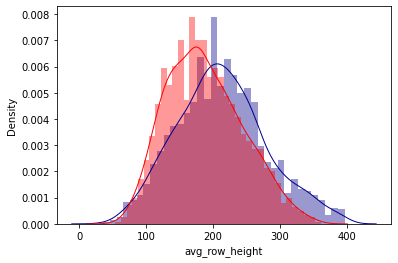

In [43]:
import seaborn as sns
sns.distplot(df_dist['top_row_height'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 1})
sns.distplot(df_dist['avg_row_height'], hist=True, kde=True, 
             bins=int(180/5), color = 'red',
             kde_kws={'linewidth': 1})
#sns_plot.figure.savefig("/media/premium/common-biscuit/main/planogram_biscuit/data/packets_ious_distribution.png")

In [22]:
df_dist.to_csv('/media/premium/common-biscuit/main/planogram_biscuit/data/raw/csvs/row_comparision.csv')